In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
# read training data
bank_train = pd.read_csv("bank_train.csv")

In [3]:
# read test data
bank_test = pd.read_csv("bank_test.csv")

In [6]:
bank_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,49,284,1,999,0,1.4,93.918,-42.7,4.957,5228.1,...,1,0,7,1,2,0,0,3,4,1
1,58,374,1,999,0,1.4,93.918,-42.7,4.963,5228.1,...,5,1,0,1,2,0,0,3,4,1
2,36,529,1,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,3,6,0,2,0,0,1,4,1
3,47,216,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,4,1,0,0,0,2,1,4,2,1
4,38,191,1,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,2,7,0,2,0,0,6,0,1


In [7]:
bank_test.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,33,122,4,999,0,1.4,93.444,-36.1,4.963,5228.1,...,9,2,5,0,2,0,0,1,1,1
1,45,133,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,6,0,6,0,0,2,0,6,0,1
2,39,302,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,6,1,0,0,1,6,0,1
3,49,602,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,0,3,0,0,0,0,3,2,1
4,24,493,1,999,0,1.4,93.918,-42.7,4.958,5228.1,...,0,2,3,1,2,2,0,3,2,1


In [8]:
bank_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'purchased', 'id', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [9]:
# split into x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

In [10]:
# Hyperparameter tuning: maxdepth
# specify number of folds for k-fold CV
n_folds = 5

In [11]:
# parameters to build the model on: specify a range of max_depth
parameters = {'max_depth': range(1,40)}

In [12]:
# instantiate the model
dtree = DecisionTreeClassifier()

In [13]:
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [14]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021389,0.003593,0.005997,0.001130,1,{'max_depth': 1},0.892424,0.893778,0.893778,0.893778,...,0.893171,0.000751,25,0.893738,0.893399,0.893399,0.893399,0.897232,0.894233,0.001505
1,0.015284,0.005026,0.003963,0.003259,2,{'max_depth': 2},0.901515,0.893778,0.915023,0.905918,...,0.902883,0.007259,6,0.918027,0.906297,0.912367,0.911988,0.904437,0.910623,0.004831
2,0.017079,0.002885,0.002878,0.001595,3,{'max_depth': 3},0.901515,0.901366,0.910470,0.901366,...,0.906829,0.007216,3,0.921442,0.921851,0.917678,0.918058,0.917330,0.919272,0.001957
3,0.016469,0.000878,0.002720,0.000413,4,{'max_depth': 4},0.912121,0.890744,0.911988,0.921093,...,0.910470,0.010414,1,0.929032,0.931335,0.928300,0.921472,0.926432,0.927314,0.003317
4,0.021120,0.001544,0.002636,0.000479,5,{'max_depth': 5},0.892424,0.892261,0.908953,0.919575,...,0.905918,0.011615,4,0.941935,0.935888,0.934370,0.937405,0.935533,0.937026,0.002639


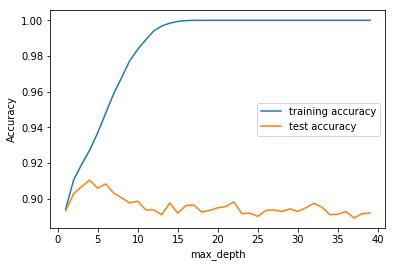

<Figure size 432x288 with 0 Axes>

In [15]:
# plotting accuracies with max_depth (code already written)
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('hyperparam.png') 

In [17]:
# observe the optimal value of max_depth from the plot and store 
# in max_depth_optimal
max_depth_optimal = 4

# Build a tree with optimal max_depth
best_tree = DecisionTreeClassifier(max_depth=max_depth_optimal)
best_tree.fit(x_train, y_train)

# make predictions on test data
predictions = best_tree.predict(bank_test.drop(['id'], axis=1))
print(predictions[:5])

# Write columns id, predictions into the output file
d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

# Write the output to file
d.to_csv('bank_predictions.csv', sep=",")

[0 0 0 0 0]
